In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
df = pd.read_csv('/home/nishesh/Desktop/Work/Trainings/archive/all_anonymized_2015_11_2017_03.csv')
df.head()

/home/nishesh/anaconda3/envs/work/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (7,8,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,NaN,None,man,5,7,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71


In [3]:
df.shape

(3552912, 16)

#### Analyzing price_eur

In [4]:
df['price_eur'].describe()

count    3.552912e+06
mean     1.625812e+06
std      2.025622e+09
min      4.000000e-02
25%      1.295340e+03
50%      7.364910e+03
75%      1.628423e+04
max      2.706149e+12
Name: price_eur, dtype: float64

After performing log transformation, price has almost normal distribution with peak value at around 1000 EUR.

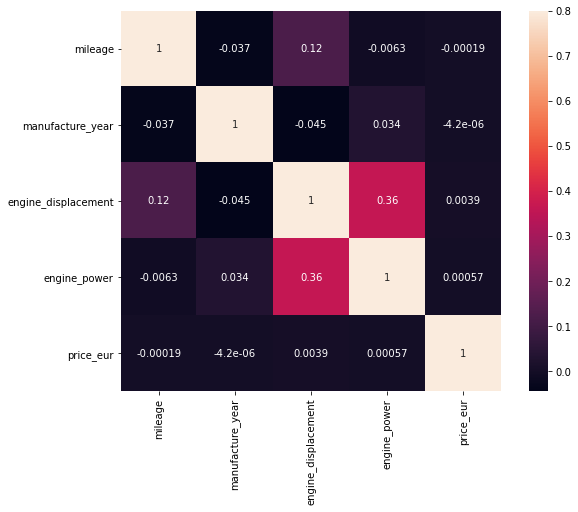

In [6]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

From the above diagram, we can see that engine_displacement and engine_power are highly correlated among other numerical attributes.

#### Handling missing data

In [7]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
color_slug,3343411,0.941034
fuel_type,1847606,0.520026
stk_year,1708156,0.480776
model,1133361,0.318995
body_type,1122914,0.316055
seat_count,749489,0.210951
engine_displacement,743414,0.209241
transmission,741630,0.208739
door_count,614373,0.172921
engine_power,554877,0.156175


In [8]:
df_new = df.drop(['color_slug', 'fuel_type', 'stk_year', 'date_last_seen', 'date_created'], axis=1)

The column with more than 40% of the missing data are dropped and we pretend that it never existed. Also, the columns date_last_seen and date_created were also dropped.

In [9]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552912 entries, 0 to 3552911
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   maker                object 
 1   model                object 
 2   mileage              float64
 3   manufacture_year     float64
 4   engine_displacement  float64
 5   engine_power         float64
 6   body_type            object 
 7   transmission         object 
 8   door_count           object 
 9   seat_count           object 
 10  price_eur            float64
dtypes: float64(5), object(6)
memory usage: 298.2+ MB


#### For maker and model column

In [10]:
df_new['maker'].unique()

array(['ford', 'skoda', 'bmw', nan, 'suzuki', 'nissan', 'opel', 'citroen',
       'seat', 'kia', 'audi', 'rover', 'toyota', 'hyundai', 'fiat',
       'volvo', 'chevrolet', 'mazda', 'jeep', 'mercedes-benz', 'subaru',
       'chrysler', 'lancia', 'smart', 'honda', 'porsche', 'dodge',
       'mitsubishi', 'mini', 'jaguar', 'lexus', 'hummer', 'bentley',
       'tesla', 'maserati', 'isuzu', 'lamborghini', 'lotus', 'volkswagen',
       'peugeot', 'renault', 'alfa-romeo', 'infinity', 'rolls-royce',
       'aston-martin', 'land-rover', 'dacia'], dtype=object)

In [11]:
df_new['maker'].value_counts()

skoda            313830
volkswagen       297256
bmw              266731
mercedes-benz    251966
audi             248602
ford             240556
opel             217708
fiat             132669
citroen          121913
renault          106831
peugeot           92130
hyundai           80602
seat              74645
toyota            72908
nissan            68008
kia               48607
volvo             48271
mazda             45666
mini              35678
smart             32918
suzuki            31184
mitsubishi        28463
honda             26225
porsche           24317
chevrolet         20856
rover             20611
jeep              17075
lancia            13759
subaru            10107
jaguar            10056
chrysler           9296
dodge              5223
alfa-romeo         4734
lexus              3911
dacia              2024
maserati           1912
land-rover         1721
isuzu              1427
bentley            1081
hummer              731
lamborghini         554
infinity        

In [12]:
df_new['model'].unique()

array(['galaxy', 'octavia', nan, ..., '125d', 'glk200-cdi', '760i'],
      dtype=object)

In [13]:
df_new['model'].value_counts()

octavia    129563
fabia       91401
golf        91234
focus       61137
astra       58376
            ...  
760i            1
cirrus          1
c32-amg         1
418i            1
c180e           1
Name: model, Length: 1012, dtype: int64

In [14]:
# Drop rows if either maker of model column contains null values
df_new = df_new[df_new['maker'].isna() | df_new['model'].isna() == False]

#### For seat_count and door_count column

In [15]:
df_new['door_count'].unique()

array(['5', '4', '3', 'None', '2', '6', '1', '7', nan, 5.0, 4.0, 3.0, 2.0,
       6.0, 9.0, 1.0, 7.0, 77.0, 58.0, 54.0, 0.0, 55.0, 22.0, 8.0, 45.0,
       49.0], dtype=object)

In [16]:
df_new['seat_count'].unique()

array(['7', '5', '4', 'None', '9', '2', '6', '8', '3', '1', '18', '50',
       '12', '74', '10', '54', '14', '13', '15', '17', '56', '20', '11',
       nan, 5.0, 4.0, 7.0, 2.0, 8.0, 6.0, 9.0, 3.0, 1.0, 17.0, 18.0, 15.0,
       58.0, 10.0, 45.0, 13.0, 55.0, 12.0, 54.0, 16.0, 57.0, 74.0, 50.0,
       0.0, 512.0, 14.0, 515.0, 52.0, 85.0, 517.0, 43.0], dtype=object)

The value of door_count and seat_count contains unrealistic values like 55, 515, etc. So, the entries with door_count > 10 and seat_count > 10 are also dropped.

In [17]:
df_new['door_count'].mode()

0    5
dtype: object

In [18]:
df_new['seat_count'].mode()

0    5
dtype: object

In [19]:
# Replace None in the column with Nan
df_new['door_count'].replace('None', np.nan, inplace=True)
df_new['seat_count'].replace('None', np.nan, inplace=True)

In [20]:
# Replace all Nan with the mode value
df_new['door_count'].replace(np.nan,df_new['door_count'].mode()[0], inplace=True)
df_new['seat_count'].replace(np.nan,df_new['seat_count'].mode()[0], inplace=True)

In [21]:
# Remove rows with door_count > 10
df_new = df_new[(df_new['door_count'].astype(int) < 11)]

In [22]:
# Remove rows with seat_count > 10
df_new = df_new[(df_new['seat_count'].astype(int) < 11)]

#### For body_type and transmission columns

In [23]:
df_new['body_type'].unique()

array([nan, 'van', 'compact', 'coupe', 'transporter', 'other',
       'convertible', 'sedan', 'stationwagon', 'offroad'], dtype=object)

In [24]:
df_new['transmission'].unique()

array(['man', 'auto', nan], dtype=object)

In [25]:
# Replace all Nan with the mode value
df_new['body_type'].replace(np.nan,df_new['body_type'].mode()[0], inplace=True)
df_new['transmission'].replace(np.nan,df_new['transmission'].mode()[0], inplace=True)

In [26]:
df_new['body_type'].unique()

array(['other', 'van', 'compact', 'coupe', 'transporter', 'convertible',
       'sedan', 'stationwagon', 'offroad'], dtype=object)

#### For numerical attributes like mileage, manufacture_year, engine_displacement and engine_power, the Nan values are replaced by their respective medians.

In [27]:
df_new['mileage'].replace(np.nan,df_new['mileage'].median(), inplace=True)
df_new['manufacture_year'].replace(np.nan,df_new['manufacture_year'].median(), inplace=True)
df_new['engine_displacement'].replace(np.nan,df_new['engine_displacement'].median(), inplace=True)
df_new['engine_power'].replace(np.nan,df_new['engine_power'].median(), inplace=True)

In [28]:
df_new.isnull().sum()

maker                  0
model                  0
mileage                0
manufacture_year       0
engine_displacement    0
engine_power           0
body_type              0
transmission           0
door_count             0
seat_count             0
price_eur              0
dtype: int64

#### Outlier detection

In [29]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_new['price_eur'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

<ipython-input-29-0040f5b4a231>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  saleprice_scaled = StandardScaler().fit_transform(df_new['price_eur'][:,np.newaxis]);


outer range (low) of the distribution:
[[-0.00066489]
 [-0.00066489]
 [-0.00066489]
 [-0.00066489]
 [-0.00066489]
 [-0.00066489]
 [-0.00066489]
 [-0.00066489]
 [-0.00066489]
 [-0.00066489]]

outer range (high) of the distribution:
[[1.95009588e-01]
 [4.07732442e-01]
 [4.19118851e-01]
 [5.57542014e-01]
 [5.74083650e-01]
 [8.50783642e+00]
 [8.57593145e+00]
 [8.57593145e+00]
 [8.57593145e+00]
 [1.55535457e+03]]


Amost all of the values are close to zero but there is one value 1.55535457e+03 which seems to deviate from the other values. So, it has the behaviour of an outlier.

#### For outlier detection using bivariate analysis

In [30]:
maximum_price = df_new['price_eur'].max()
maximum_price

2706149053064.4

In [32]:
df_2 = df_new[df_new['price_eur'] != maximum_price]

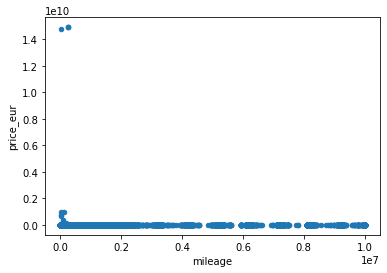

In [34]:
data = pd.concat([df_2['price_eur'], df_2['mileage']], axis=1)
data.plot.scatter(x='mileage', y='price_eur');

#### As price contains few large values, so its column is transformed by taking log.

/home/nishesh/anaconda3/envs/work/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_eur', ylabel='Density'>

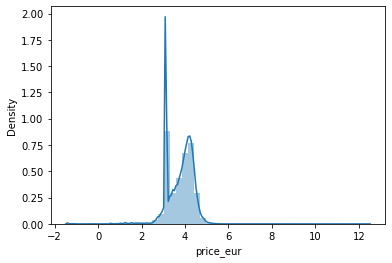

In [5]:
sns.distplot(np.log10(df_new['price_eur']))

In [40]:
df_new['Price_with_log'] = np.log10(df_new['price_eur'])

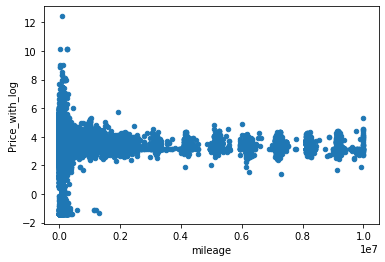

In [42]:
data = pd.concat([df_new['Price_with_log'], df_new['mileage']], axis=1)
data.plot.scatter(x='mileage', y='Price_with_log');

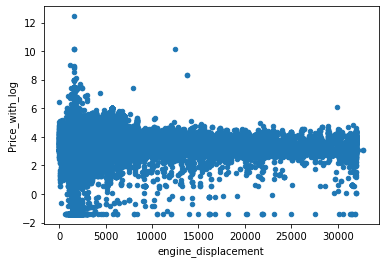

In [44]:
data = pd.concat([df_new['Price_with_log'], df_new['engine_displacement']], axis=1)
data.plot.scatter(x='engine_displacement', y='Price_with_log');

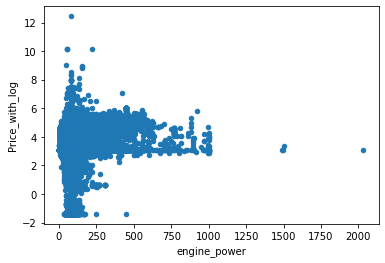

In [45]:
data = pd.concat([df_new['Price_with_log'], df_new['engine_power']], axis=1)
data.plot.scatter(x='engine_power', y='Price_with_log');

#### After log transformation, the outlier seems to be less. In the last graph, some data points with engine_power > 1250 seems to be an outlier so, they are removed.

In [47]:
df_new = df_new[(df_new['engine_power'] < 1250)]

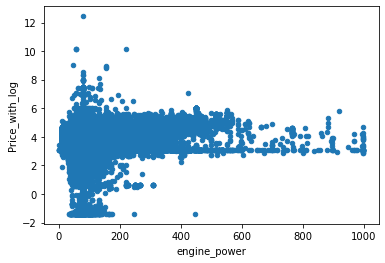

In [48]:
data = pd.concat([df_new['Price_with_log'], df_new['engine_power']], axis=1)
data.plot.scatter(x='engine_power', y='Price_with_log');